In [1]:
# almost by definition, scRNAseq is highly dimensional (in both cells and genes). Unfortunately more dimensions 
# are not necessarily more informative; but they are almost always introduce more noise.
# enter dimensionality reduction, where the goal is to preserve as much information as possible
# while excluding extraneous information. this process is known as 'embedding'
# there are multiple flavors of dimensionality reduction, with popular ones being PCA, UMAP, and 
# t-SNE. t-SNE and UMAP are relatively robust (i.e. they reduce the same data in the same way across 
# multiple runs*) assuming the correct initialization choices are made.

In [2]:
# thankfully for ease of implementation, all methods are implemented in scanpy
import scanpy as sc

sc.settings.verbosity = 0
sc.settings.set_figure_params(dpi=80, facecolor="white", frameon=False)

In [3]:
adata = sc.read(filename="s4d8_feature_selection.h5ad")

In [4]:
adata.X = adata.layers["log1p_norm"]

In [5]:
### PCA
# the main issue at hand: not all features contain important information and important features
# are often redundant. PCA creates a new set of variables that are uncorrelated (orthogonal vectors)
# PCs are linear combinations of features (in our case genes) that are ranked with decreasing order
# of variance. This means the first PC will (or should) contain the largest possible variance in the 
# dataset. low variance PCs are discarded to reduce the dimensionality of the data.

# Unfortunately, scRNAseq data are sparse, making them non-linear, so visualization with linear 
# dimensionality reduction techniques (i.e. PCA) isn't great. PCA then is typically used to select 
# the top n PCs for later analysis

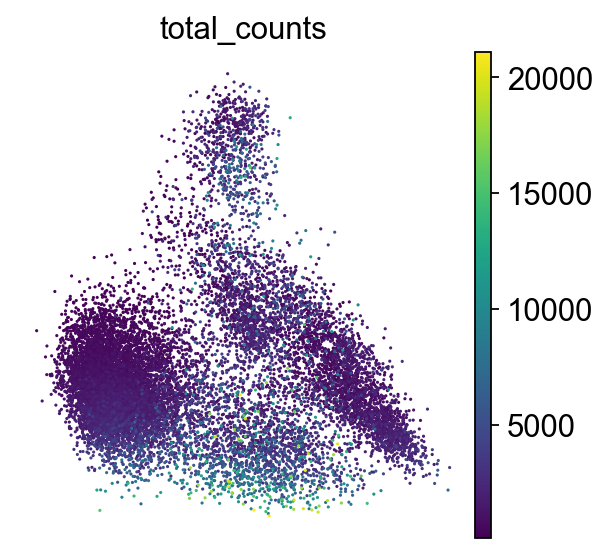

In [6]:
# first: set highly variable as highly divergent to use our deviant genes. We do this to help the 
# PCA process 'focus' on the variable genes of interest and ignore the noise
adata.var['highly_variable'] = adata.var['highly_deviant']
sc.pp.pca(adata, svd_solver="arpack", use_highly_variable=True)
sc.pl.pca_scatter(adata, color="total_counts")

In [7]:
### t-SNE
# graph based,non-linear dimensionality reduction (appropriate for scRNAseq data). yields 2 or 3d 
# projections of high dimension data. Method defines a Gaussian probabilit distribution based on 
# euclidean distance between data points (but you can implement other distance measures like Jaccard
# or manhattan)
# Then a T dist is used to recreate the probability distribution in a low dimensional space where 
# the embedding is optimized using gradient descent.

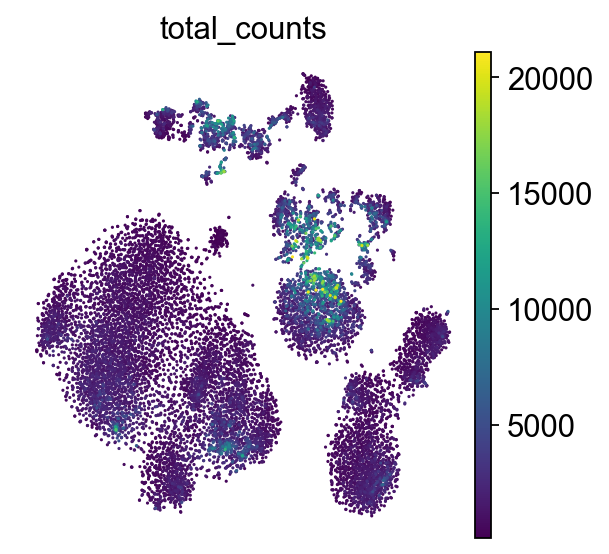

In [15]:
sc.tl.tsne(adata, use_rep="X_pca")
sc.pl.tsne(adata, color="total_counts")

In [9]:
### UMAP
# graph based, non-linear dimensionality reductino technique, similar to tSNE in principle. 
# constructs high dimensional graph representation of the dataset and optimizes the low dim. graph 
# to be as structurally similar as possible to the original graph.

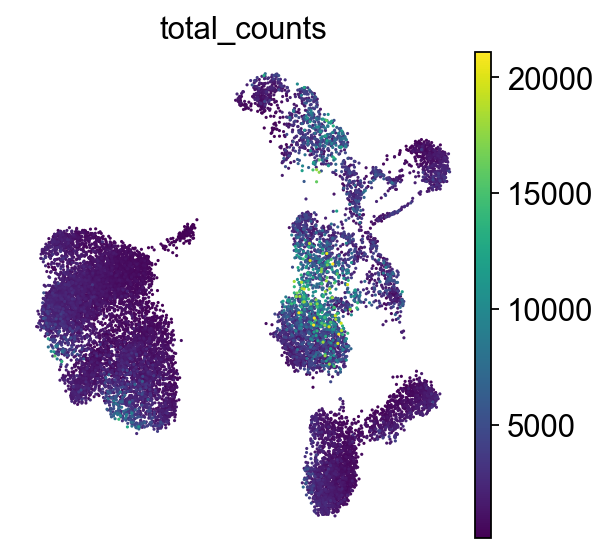

In [10]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color="total_counts")

/opt/miniconda3/envs/test_jupyter_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


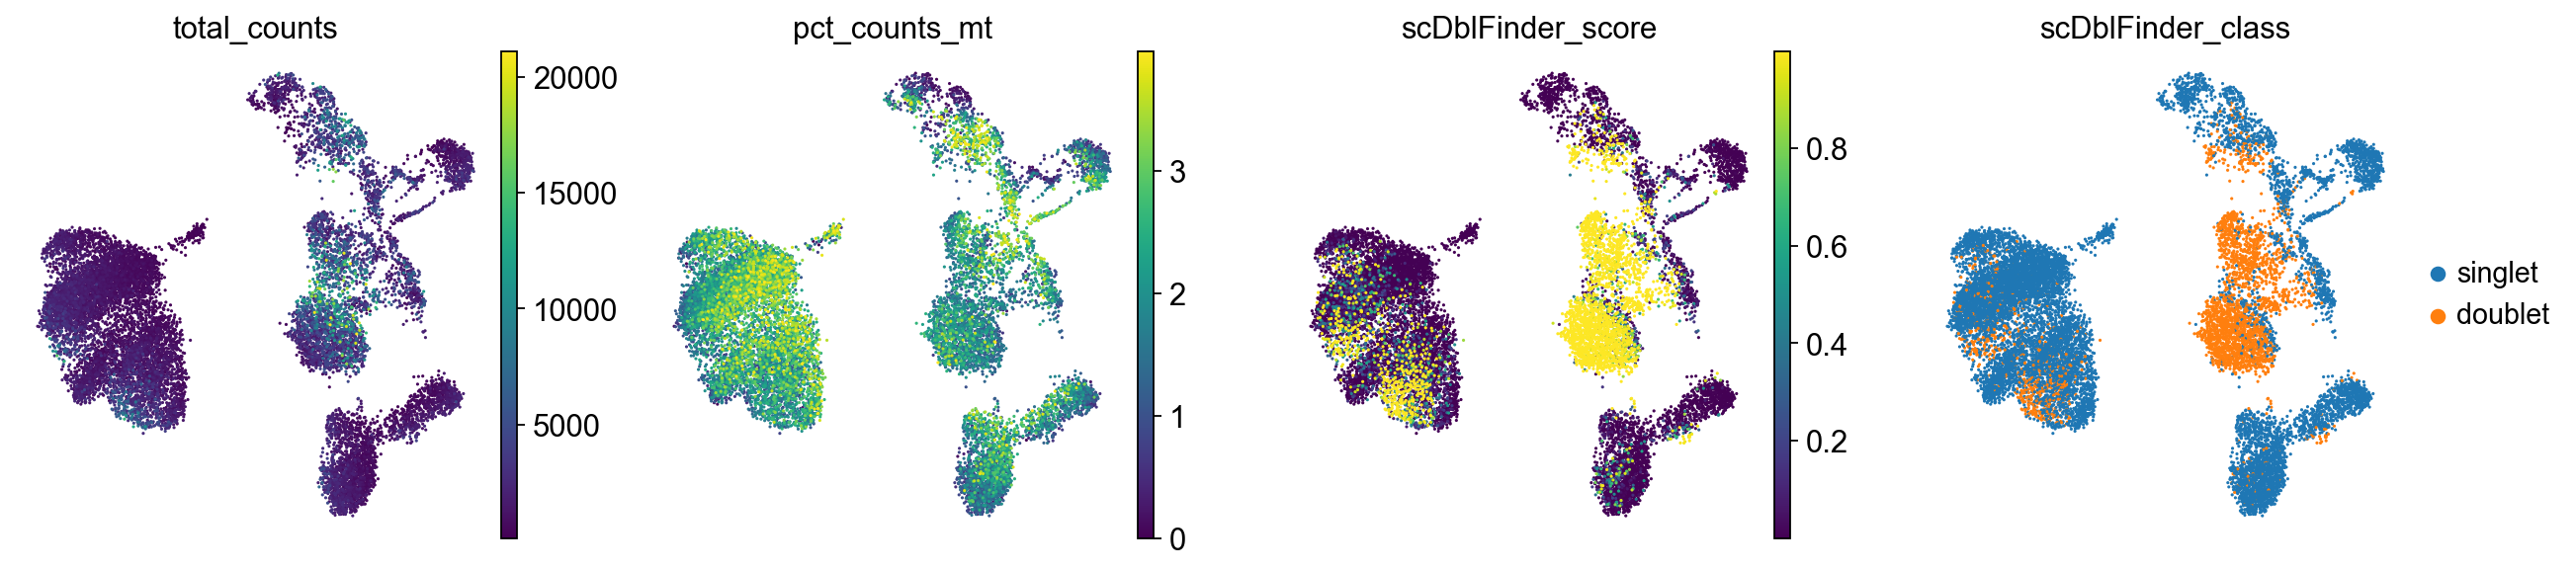

In [13]:
# now we can look at QC metrics to identify low quality cells in the context of our dim. reductions
sc.pl.umap(adata, color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"])

/opt/miniconda3/envs/test_jupyter_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


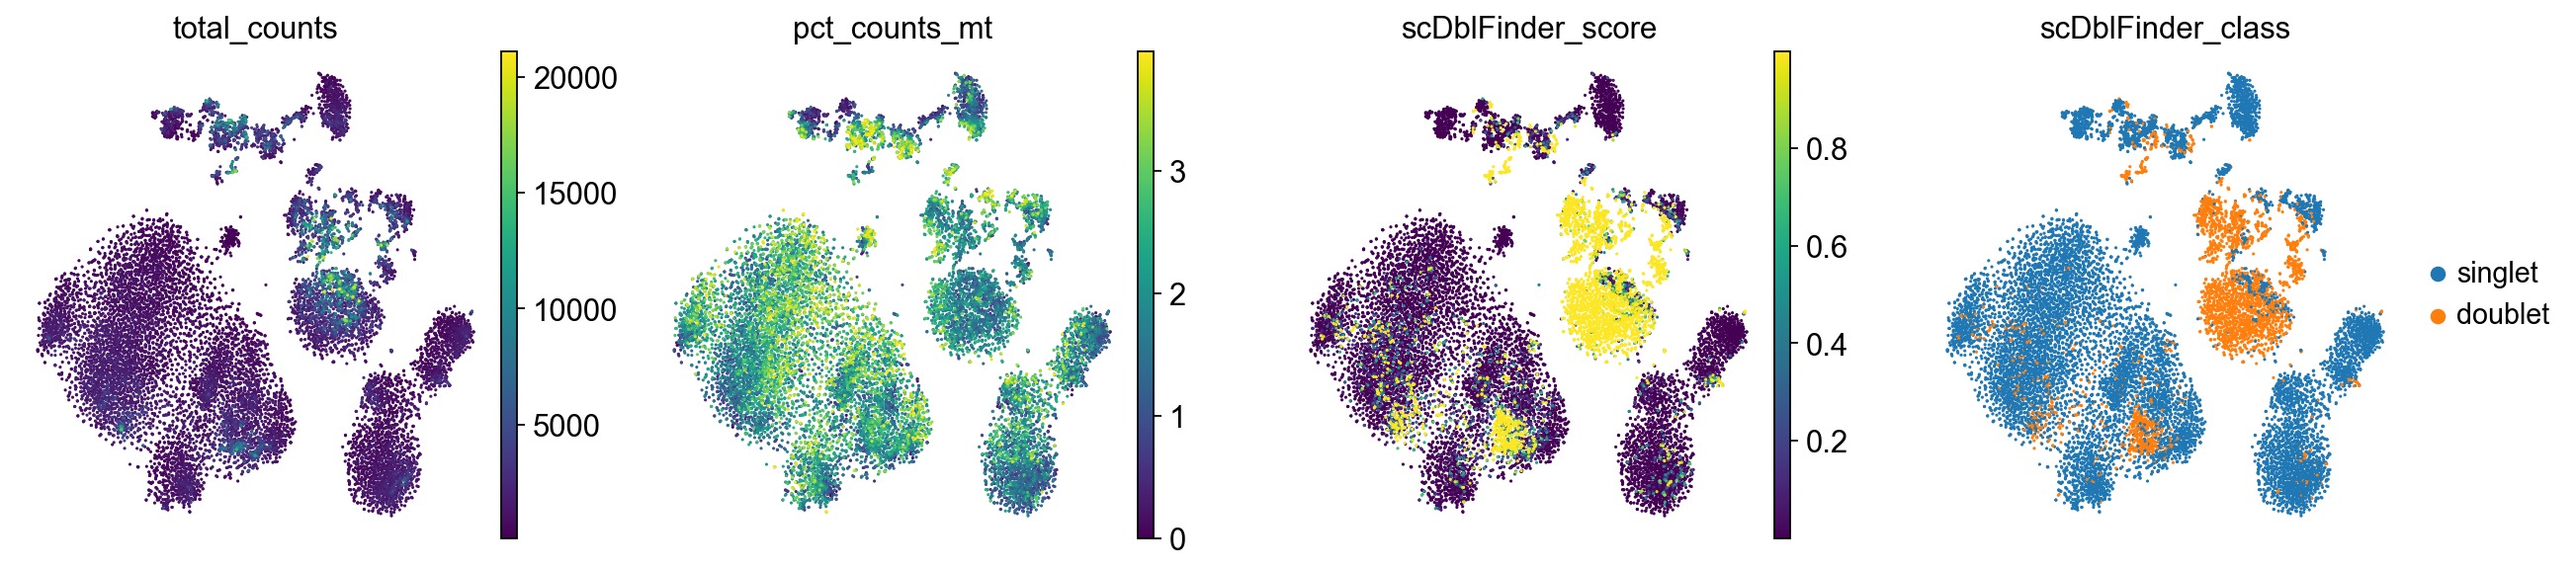

In [16]:
sc.pl.tsne(adata, color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"])

/opt/miniconda3/envs/test_jupyter_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


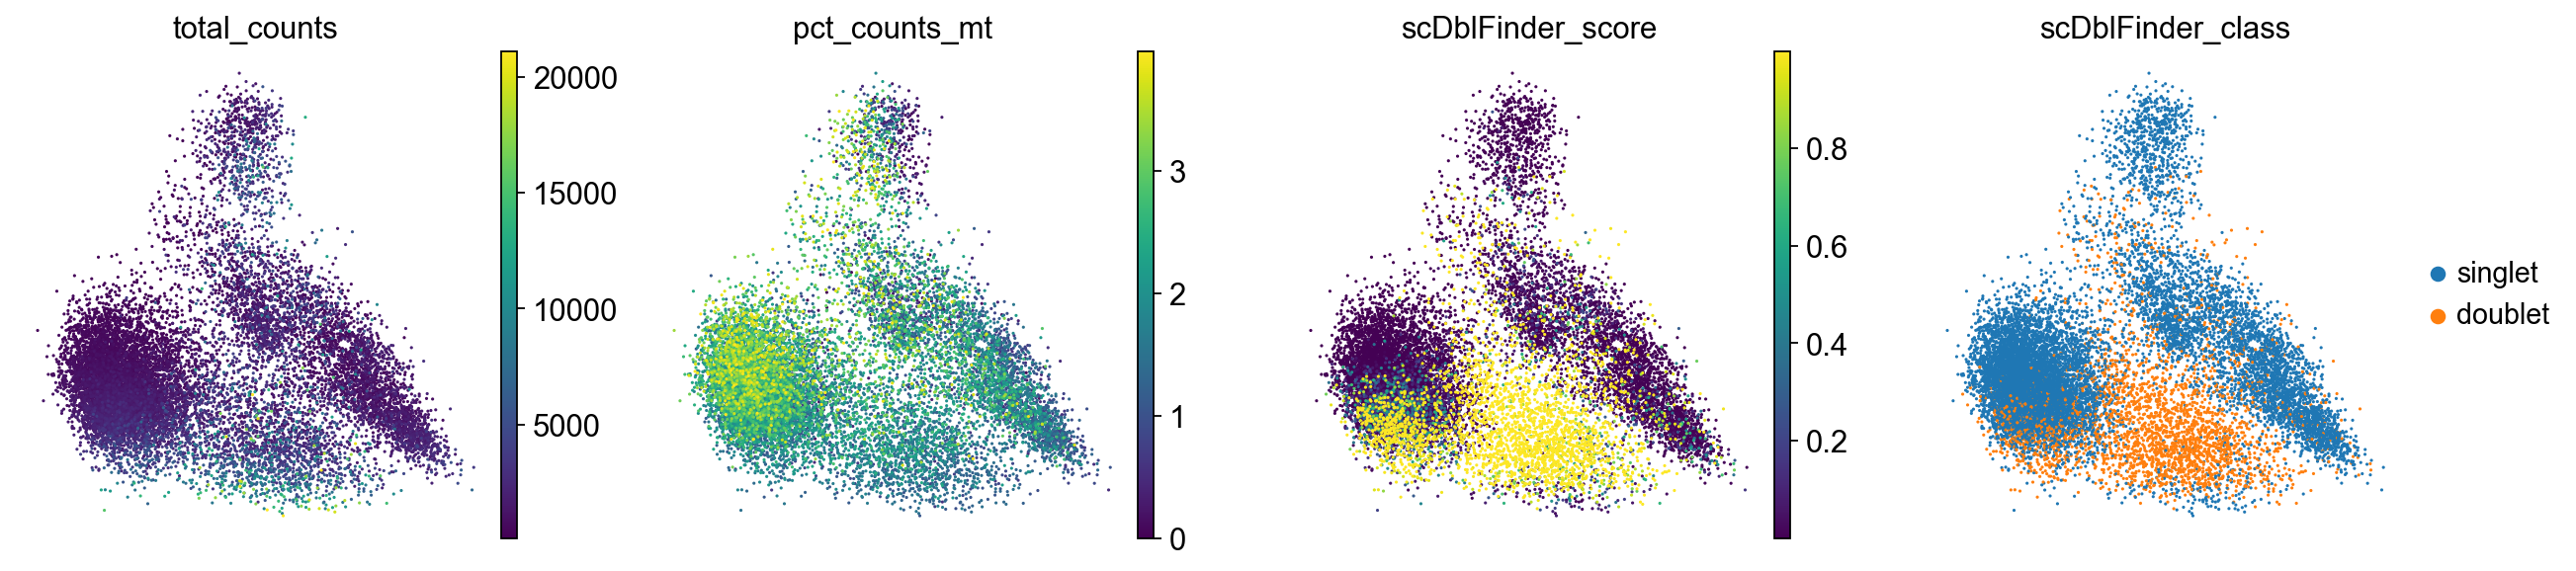

In [17]:
sc.pl.pca_scatter(adata, color=["total_counts", "pct_counts_mt", "scDblFinder_score", "scDblFinder_class"])

In [18]:
# interesting note: doublets are clustering in all dimension reduction methods!

In [19]:
adata.write("s4d8_dimensionality_reduction.h5ad")